In [1]:
import warnings

warnings.filterwarnings("ignore")

import pyspark.sql
from pyspark.sql.functions import *

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import StructType, StructField, StringType

import wrangle as w

In [2]:
df = w.wrangle_311()

In [6]:
df.show(1, vertical = True)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  el paso st,... 
 council_district     | 005                  
 num_weeks_late       | -142.6441088         
 zipcode              | 78207                
 case_age             | 1316                 
 days_to_closed       | 0                    
 case_lifetime        | 0                    
 department           | Animal Care Services 
 dept_subject_to_SLA  | true                 
only showing top 1 row



### On average, how late are the late cases by department?

Text(0.5, 1.0, 'Avg Number of Days Late By Department')

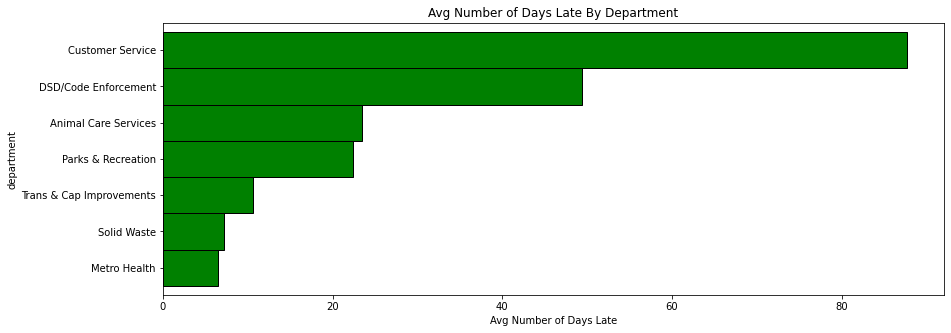

In [3]:
(
    #only going to look at cases that were late
    df.where('case_late')
    
    #group the cases by the department
    .groupby("department")
    
    #get an avg of the number of days it was late
    .agg(avg("num_days_late").alias("days_cases_late"))
    
    #panda panda panda
    .toPandas()
    
    #set index to department
    .set_index("department")
    
    #sort the values by the average number of days late
    .days_cases_late.sort_values()
    
    #plot
    .plot.barh(width=1, edgecolor="black", color='green', figsize=(14, 5))
)
plt.xlabel("Avg Number of Days Late")
plt.title("Avg Number of Days Late By Department")